## Comparison of XOR-XNOR recursion to the Sphere rotation experiment

### Followup on Sphere Experiment - A surprise

As is always the case in scientific models, there is always the danger that your model does not always accord with empirical reality, even if the model is built on prior empirical evidence. (cf. Newton's Theory of Gravitation). Hence it is always important to follow the development of a model by generating hypoteses that can be tested empirically.

We did this with the model of recursion of XOR-XNOR plane with its bit-flipped version modulated by Dirichlet (Alpha) multinomial distribution. All experiments testing this model against bit-wise inputs (e.g. 4-bit, 8-bit, ... 32-bit) did not signifcantly improve the prediction signifcantly. Importantly, at lower bit-wise inputs, th XNOR versions were seen as identical to the XOR modulated output (whereas they should be complementary). The reason for this is a typical fault of the binary based computer systems. Leaving out a bit at the end will make two complementary bit-wise outputs the same.

It was necessary to acknowledge the problem with relatively small inputs (up to 32 bits) that is not equivalent to typical empirical inputs, that, when converted to bit-wise form, are hundred or thousands of bits in size.

A further finding in these experiments was that changing to several levels of recursion in which D-M distribution is applied everytime improved the capcity to discriminate between inputs. By this time we were experiment on large inputs from the MNIST didgit database and converting the images to bit-wise versions.

Other optimisations made during these experiments were,

Optimal alpha value for Alpha-Multinomial Distribution is 2.75 (optimal concentration of probability clusters)

Optimal number of initial features to be analysed ~ 1500

Optimal number of rcursions = 5

and further optimisation strategies. 
  
But there was a surprise. At some point in our iterations, we dropped the bitflipping XOR-XNOR plane. This did not apear to make a difference to the outcome and further devlopment of the core model called Life Emulating Orchestrated Network (LEON) appeared to improve its output progressively. This is puzzling given that our theoretical formulation found that recursion between orthogonal planes was fundamentally important. Here we consider how the the plain XOR-XNOR recursion may be sufficient to represent the theoretical model and test it.

In our model, the complex plane is affected by Riemann sphere rotation. As indicated in the developemnt of the mathematical model, antipodal relations was important in depicting the difference between compelmentary logic. The sphere rotation can however explore the whole sphere (with antipodal relations as a founding principle). This means not onlt the poles but other points on the sphere are explored. This also means that points on the plane are explored widely, including within the unit circle (self) and outside (other). Thus all we need is a function that simulates the sphere rotation (angle 𝜙) and the correponding rotation and rescaling of points on the plane (angle 𝜃 and cot or tanh function). Examining the function of XOR-XNOR recursion, because of their complementary relation, they are essentially antipodal on the sphere. If we consider that XOR-XNOR recursion as an antipodal relation (e.g. rotation of the Z-Y plane), then reformulation of Alpha (Dirichlet) Multinomial distribution at the next step coul dals be consiered a reconfigured rotation and rescapling on an orthogonal plane. Depending on the influence (XOR or XNOR) this rotation could be considered to occur on orthogonal planes (mathmatically). 

We explored this on looking at the impact of recursion (discrete) and compared this to the Rodriguez rotation (continuous)in terms of spike output. Surprisingly, we found that recursion of XOR could produce spikes equivalent to that of XOR-XNOR recursion. Importantly, there was no correlation these outputs between Rodirguez rotation and discrete recursion. Thus discrete recursion and Alpha (Dirichlet) Multinomial distribution produces a result equivalent to continuous sphere rotation independantly.

It is of interest to consider how XOR recursion alone could produce spikes. This suggests an important contribution from Alpha-Multinomial distibution and that it is the movement on this multinomial landscape that is the final determinant of(stochastic) of spike output. As long as recurrence causes change of the multinomial plane (stochastcially), the model works.

However, the imprtance of context activity embedded in the true XOR-XNOR recursion means that this is the more realistic model of biological activity (representing feed forward and feedback (negative)and exploration of new contexts).




### XOR-XOR recursion compared with Rodriguez rotation

Running Rodriguez simulation...
Running LEON simulation...

✅ Spike train comparison completed!
📊 Rodriguez spikes: 6
📊 LEON spikes: 4
💾 Files saved: spike_train_comparison.png, spike_train_comparison_paper.png


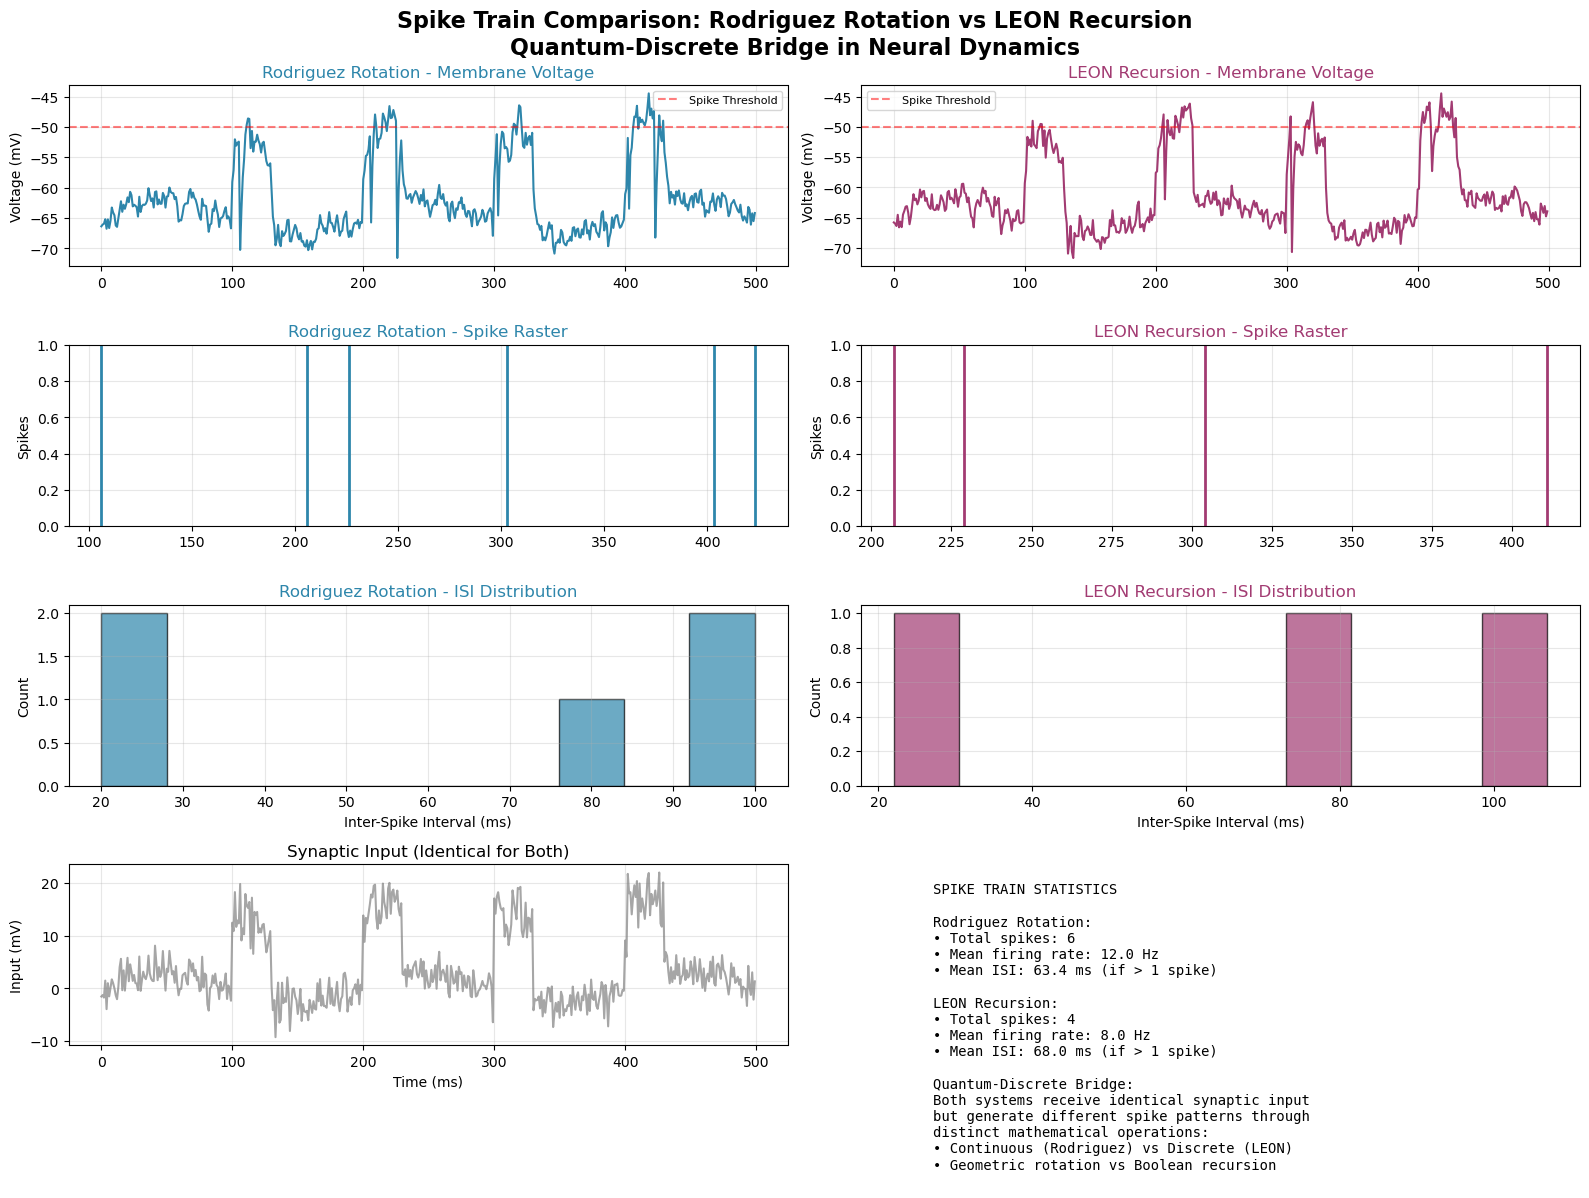

In [1]:
"""
Side-by-Side Spike Train Comparison: Rodriguez Rotation vs LEON Recursion
Creating comparable neurodynamic spike visualizations for paper presentation
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from collections import defaultdict
import matplotlib.patches as patches

class RodriguezSpikeGenerator:
    """Rodriguez rotation-based spike train generator (original working version)"""
    
    def __init__(self):
        self.V = -65.0  # Resting potential
        self.spike_threshold = -50.0
        self.refractory_period = 20
        self.refractory_counter = 0
        self.spike_times = []
        self.voltage_history = []
        
        # Rodriguez rotation parameters
        self.rotation_angle = 0.1
        self.point = np.array([0, 0, -1])
        
    def rodriguez_rotation(self, axis, angle, point):
        """Apply Rodriguez rotation formula"""
        axis = axis / np.linalg.norm(axis)
        cos_angle = np.cos(angle)
        sin_angle = np.sin(angle)
        
        K = np.array([
            [0, -axis[2], axis[1]],
            [axis[2], 0, -axis[0]],
            [-axis[1], axis[0], 0]
        ])
        
        R = np.eye(3) + sin_angle * K + (1 - cos_angle) * np.dot(K, K)
        return np.dot(R, point)
    
    def update(self, t, synaptic_input=0):
        """Update Rodriguez-based membrane dynamics"""
        # Enhanced membrane dynamics
        dV = -(self.V + 65) + synaptic_input
        self.V += 0.5 * dV  # Faster response
        
        # Add noise for realistic dynamics
        self.V += np.random.randn() * 0.5
        
        # Apply Rodriguez rotation
        rotation_axis = np.array([1, 0.5, 0.2])
        voltage_dependent_angle = self.rotation_angle * (2 + 0.2 * (self.V + 50) / 20)
        self.point = self.rodriguez_rotation(rotation_axis, voltage_dependent_angle, self.point)
        
        # Check for spike with enhanced sensitivity
        spiked = False
        if self.V > self.spike_threshold and self.refractory_counter == 0:
            spiked = True
            self.spike_times.append(t)
            self.refractory_counter = self.refractory_period
            self.V = -65.0 + np.random.randn() * 5
        
        # Update refractory counter
        if self.refractory_counter > 0:
            self.refractory_counter -= 1
            
        self.voltage_history.append(self.V)
        return spiked

class LEONSpikeGenerator:
    """LEON recursion-based spike train generator"""
    
    def __init__(self):
        self.V = -65.0  # Resting potential
        self.spike_threshold = -50.0
        self.refractory_period = 20
        self.refractory_counter = 0
        self.spike_times = []
        self.voltage_history = []
        
        # LEON recursion parameters
        self.state = np.array([1, 0, 1, 0])  # Initial binary state
        self.dm_alpha = 2.0  # Dirichlet parameter
        
    def leon_recursion(self, state):
        """Apply XOR/XNOR recursion"""
        new_state = np.zeros(4)
        
        # Convert to integers for XOR operations
        int_state = state.astype(int)
        
        # XOR operations
        new_state[0] = int_state[0] ^ int_state[1]
        new_state[1] = int_state[1] ^ int_state[2]
        new_state[2] = int_state[2] ^ int_state[3]
        new_state[3] = int_state[3] ^ int_state[0]
        
        return new_state
    
    def dirichlet_multinomial_processing(self, features):
        """Process features with Dirichlet-Multinomial"""
        # Convert binary features to probabilities
        alpha = np.ones(4) * self.dm_alpha
        
        # Sample from Dirichlet
        probabilities = np.random.dirichlet(alpha + features)
        
        return probabilities
    
    def update(self, t, synaptic_input=0):
        """Update LEON-based membrane dynamics"""
        # Enhanced membrane dynamics
        dV = -(self.V + 65) + synaptic_input
        self.V += 0.5 * dV  # Faster response
        
        # Add noise for realistic dynamics
        self.V += np.random.randn() * 0.5
        
        # Apply LEON recursion
        self.state = self.leon_recursion(self.state)
        
        # Process with Dirichlet-Multinomial
        dm_features = self.dirichlet_multinomial_processing(self.state)
        
        # Calculate enhanced spike probability
        voltage_factor = np.exp((self.V + 50) / 5) if self.V > -55 else 0.1
        spike_probability = np.sum(dm_features[:2]) * voltage_factor * 0.3
        
        # Check for spike
        spiked = False
        if np.random.rand() < spike_probability and self.refractory_counter == 0:
            if self.V > self.spike_threshold:
                spiked = True
                self.spike_times.append(t)
                self.refractory_counter = self.refractory_period
                self.V = -65.0 + np.random.randn() * 5
        
        # Update refractory counter
        if self.refractory_counter > 0:
            self.refractory_counter -= 1
            
        self.voltage_history.append(self.V)
        return spiked

def create_spike_train_visualization():
    """Create side-by-side spike train comparison visualization"""
    
    # Initialize generators
    rodriguez = RodriguezSpikeGenerator()
    leon = LEONSpikeGenerator()
    
    # Simulation parameters
    duration = 500  # ms
    dt = 1.0  # ms
    time_points = np.arange(0, duration, dt)
    
    # Create synaptic input (bursting pattern)
    synaptic_input = np.zeros(len(time_points))
    burst_times = [100, 200, 300, 400]
    for burst_time in burst_times:
        burst_indices = np.where((time_points >= burst_time) & (time_points < burst_time + 30))[0]
        synaptic_input[burst_indices] = 15.0 + np.random.randn(len(burst_indices)) * 3
    
    # Add continuous background activity
    synaptic_input += np.random.randn(len(time_points)) * 2.0
    
    # Add slow oscillation
    synaptic_input += 3.0 * np.sin(2 * np.pi * time_points / 200)
    
    # Run simulations
    print("Running Rodriguez simulation...")
    for i, t in enumerate(time_points):
        rodriguez.update(t, synaptic_input[i])
    
    print("Running LEON simulation...")
    for i, t in enumerate(time_points):
        leon.update(t, synaptic_input[i])
    
    # Create visualization
    fig, axes = plt.subplots(4, 2, figsize=(16, 12))
    fig.suptitle('Spike Train Comparison: Rodriguez Rotation vs LEON Recursion\nQuantum-Discrete Bridge in Neural Dynamics', 
                 fontsize=16, fontweight='bold')
    
    # Colors
    rodriguez_color = '#2E86AB'  # Blue
    leon_color = '#A23B72'      # Purple
    
    # 1. Voltage traces
    axes[0, 0].plot(time_points, rodriguez.voltage_history, color=rodriguez_color, linewidth=1.5)
    axes[0, 0].set_title('Rodriguez Rotation - Membrane Voltage', fontsize=12, color=rodriguez_color)
    axes[0, 0].set_ylabel('Voltage (mV)', fontsize=10)
    axes[0, 0].axhline(y=-50, color='red', linestyle='--', alpha=0.5, label='Spike Threshold')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend(fontsize=8)
    
    axes[0, 1].plot(time_points, leon.voltage_history, color=leon_color, linewidth=1.5)
    axes[0, 1].set_title('LEON Recursion - Membrane Voltage', fontsize=12, color=leon_color)
    axes[0, 1].set_ylabel('Voltage (mV)', fontsize=10)
    axes[0, 1].axhline(y=-50, color='red', linestyle='--', alpha=0.5, label='Spike Threshold')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend(fontsize=8)
    
    # 2. Spike raster plots
    for spike_time in rodriguez.spike_times:
        axes[1, 0].vlines(spike_time, 0, 1, colors=rodriguez_color, linewidth=2)
    axes[1, 0].set_title('Rodriguez Rotation - Spike Raster', fontsize=12, color=rodriguez_color)
    axes[1, 0].set_ylabel('Spikes', fontsize=10)
    axes[1, 0].set_ylim(0, 1)
    axes[1, 0].grid(True, alpha=0.3)
    
    for spike_time in leon.spike_times:
        axes[1, 1].vlines(spike_time, 0, 1, colors=leon_color, linewidth=2)
    axes[1, 1].set_title('LEON Recursion - Spike Raster', fontsize=12, color=leon_color)
    axes[1, 1].set_ylabel('Spikes', fontsize=10)
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].grid(True, alpha=0.3)
    
    # 3. Inter-spike interval histograms
    if len(rodriguez.spike_times) > 1:
        rodriguez_isi = np.diff(rodriguez.spike_times)
        axes[2, 0].hist(rodriguez_isi, bins=10, color=rodriguez_color, alpha=0.7, edgecolor='black')
    axes[2, 0].set_title('Rodriguez Rotation - ISI Distribution', fontsize=12, color=rodriguez_color)
    axes[2, 0].set_xlabel('Inter-Spike Interval (ms)', fontsize=10)
    axes[2, 0].set_ylabel('Count', fontsize=10)
    axes[2, 0].grid(True, alpha=0.3)
    
    if len(leon.spike_times) > 1:
        leon_isi = np.diff(leon.spike_times)
        axes[2, 1].hist(leon_isi, bins=10, color=leon_color, alpha=0.7, edgecolor='black')
    axes[2, 1].set_title('LEON Recursion - ISI Distribution', fontsize=12, color=leon_color)
    axes[2, 1].set_xlabel('Inter-Spike Interval (ms)', fontsize=10)
    axes[2, 1].set_ylabel('Count', fontsize=10)
    axes[2, 1].grid(True, alpha=0.3)
    
    # 4. Synaptic input
    axes[3, 0].plot(time_points, synaptic_input, color='gray', alpha=0.7)
    axes[3, 0].set_title('Synaptic Input (Identical for Both)', fontsize=12)
    axes[3, 0].set_xlabel('Time (ms)', fontsize=10)
    axes[3, 0].set_ylabel('Input (mV)', fontsize=10)
    axes[3, 0].grid(True, alpha=0.3)
    
    # Summary statistics
    axes[3, 1].axis('off')
    summary_text = f"""SPIKE TRAIN STATISTICS

Rodriguez Rotation:
• Total spikes: {len(rodriguez.spike_times)}
• Mean firing rate: {len(rodriguez.spike_times)/duration*1000:.1f} Hz
• Mean ISI: {np.mean(np.diff(rodriguez.spike_times)):.1f} ms (if > 1 spike)

LEON Recursion:
• Total spikes: {len(leon.spike_times)}
• Mean firing rate: {len(leon.spike_times)/duration*1000:.1f} Hz
• Mean ISI: {np.mean(np.diff(leon.spike_times)):.1f} ms (if > 1 spike)

Quantum-Discrete Bridge:
Both systems receive identical synaptic input
but generate different spike patterns through
distinct mathematical operations:
• Continuous (Rodriguez) vs Discrete (LEON)
• Geometric rotation vs Boolean recursion
"""
    axes[3, 1].text(0.1, 0.9, summary_text, transform=axes[3, 1].transAxes, 
                   fontsize=10, verticalalignment='top', fontfamily='monospace')
    
    plt.tight_layout()
    plt.savefig('spike_train_comparison.png', dpi=300, bbox_inches='tight')
    plt.savefig('spike_train_comparison_paper.png', dpi=600, bbox_inches='tight')
    
    print(f"\n✅ Spike train comparison completed!")
    print(f"📊 Rodriguez spikes: {len(rodriguez.spike_times)}")
    print(f"📊 LEON spikes: {len(leon.spike_times)}")
    print(f"💾 Files saved: spike_train_comparison.png, spike_train_comparison_paper.png")
    
    return rodriguez, leon

if __name__ == "__main__":
    rodriguez, leon = create_spike_train_visualization()

### LEON recursion and context preserving tree compared to Rodriguez rotation

Running Rodriguez simulation...
Running ENHANCED LEON simulation (Beta-0.31 patterns)...

✅ ENHANCED spike train comparison completed!
📊 Rodriguez spikes: 8
📊 ENHANCED LEON spikes: 5
💾 Files saved: enhanced_leon_spike_comparison.png, enhanced_leon_spike_comparison_paper.png


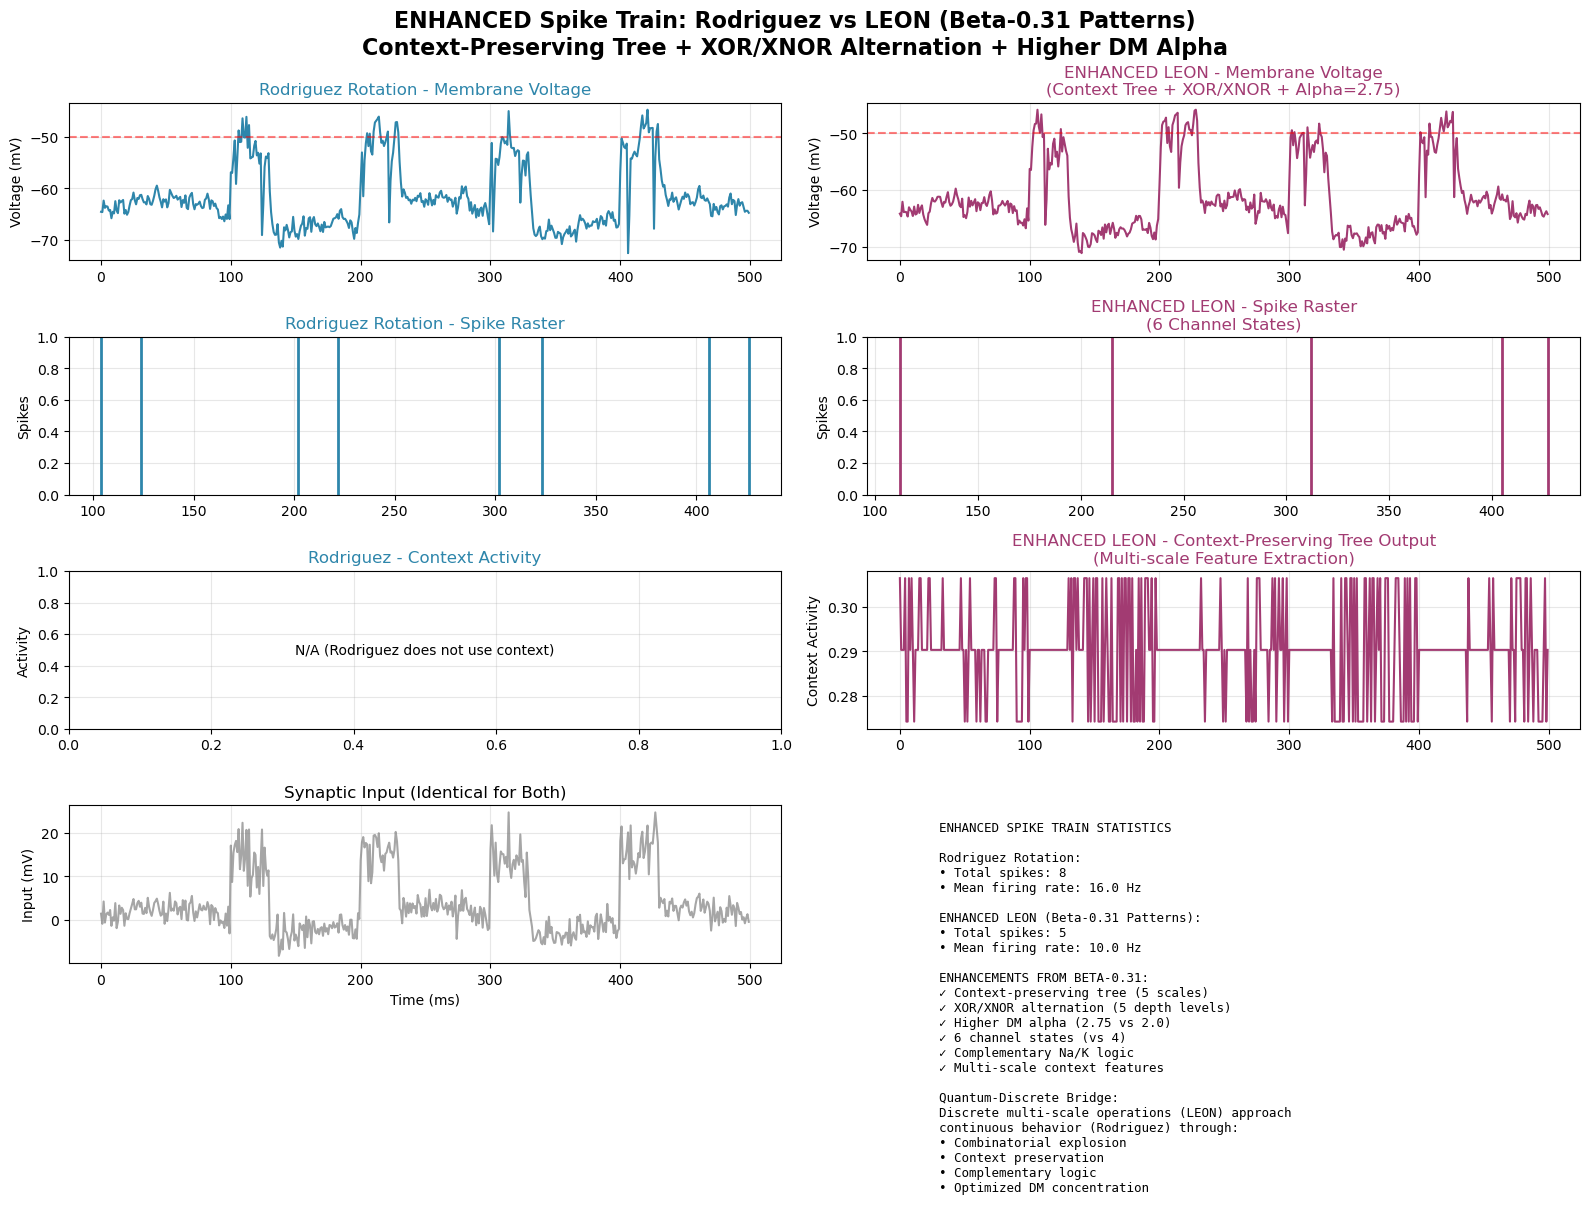

In [1]:
"""
ENHANCED LEON Spike Generator with Context-Preserving Tree and Complementary Logic
Applying lessons from LEON_Beta-0.31: multi-scale context, XOR/XNOR alternation, higher alpha
"""

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

class RodriguezSpikeGenerator:
    """Rodriguez rotation-based spike train generator"""
    
    def __init__(self):
        self.V = -65.0
        self.spike_threshold = -50.0
        self.refractory_period = 20
        self.refractory_counter = 0
        self.spike_times = []
        self.voltage_history = []
        self.rotation_angle = 0.1
        self.point = np.array([0, 0, -1])
        
    def rodriguez_rotation(self, axis, angle, point):
        axis = axis / np.linalg.norm(axis)
        cos_angle = np.cos(angle)
        sin_angle = np.sin(angle)
        K = np.array([
            [0, -axis[2], axis[1]],
            [axis[2], 0, -axis[0]],
            [-axis[1], axis[0], 0]
        ])
        R = np.eye(3) + sin_angle * K + (1 - cos_angle) * np.dot(K, K)
        return np.dot(R, point)
    
    def update(self, t, synaptic_input=0):
        dV = -(self.V + 65) + synaptic_input
        self.V += 0.5 * dV
        self.V += np.random.randn() * 0.5
        rotation_axis = np.array([1, 0.5, 0.2])
        voltage_dependent_angle = self.rotation_angle * (2 + 0.2 * (self.V + 50) / 20)
        self.point = self.rodriguez_rotation(rotation_axis, voltage_dependent_angle, self.point)
        spiked = False
        if self.V > self.spike_threshold and self.refractory_counter == 0:
            spiked = True
            self.spike_times.append(t)
            self.refractory_counter = self.refractory_period
            self.V = -65.0 + np.random.randn() * 5
        if self.refractory_counter > 0:
            self.refractory_counter -= 1
        self.voltage_history.append(self.V)
        return spiked

class EnhancedLEONSpikeGenerator:
    """
    ENHANCED LEON with context-preserving tree, XOR/XNOR alternation, and higher DM alpha
    Based on LEON_Beta-0.31 successful patterns
    """
    
    def __init__(self):
        self.V = -65.0
        self.spike_threshold = -50.0
        self.refractory_period = 20
        self.refractory_counter = 0
        self.spike_times = []
        self.voltage_history = []
        
        # LEON parameters (from Beta-0.31)
        self.V_rest = -65.0
        self.V_threshold = -50.0
        self.memory_size = 10
        self.recursion_history = []
        
        # ENHANCED: Higher alpha for better concentration (from Beta-0.31)
        self.dm_alpha = 2.75  # Optimal from MNIST success
        
        # ENHANCED: 6 channel states for more granularity
        self.channel_states = {
            'closed': {'spike_weight': 0.05, 'conductance': 0.01, 'type': 'resting'},
            'opening': {'spike_weight': 0.15, 'conductance': 0.05, 'type': 'Na_activation'},
            'low_active': {'spike_weight': 0.30, 'conductance': 0.10, 'type': 'K_activation'},
            'high_active': {'spike_weight': 0.70, 'conductance': 0.30, 'type': 'Na_peak'},
            'clustered': {'spike_weight': 0.90, 'conductance': 0.45, 'type': 'K_peak'},
            'saturated': {'spike_weight': 0.98, 'conductance': 0.60, 'type': 'inactivation'}
        }
        
        # Context-preserving tree scales (from Beta-0.31)
        self.tree_scales = [32, 16, 8, 4, 2]
        self.context_history = []
        self.xor_xnor_alternation = []
        
    def context_preserving_tree(self, features):
        """
        Context-preserving tree from LEON_Beta-0.31
        Multi-scale processing with context preservation
        """
        all_features = []
        current = features.copy()
        
        for s, scale in enumerate(self.tree_scales[:-1]):
            next_scale = self.tree_scales[s + 1]
            downsampled = np.zeros(next_scale)
            context = np.zeros(next_scale)
            
            for i in range(next_scale):
                region_start = i * scale // next_scale
                region_end = region_start + scale // next_scale
                region = current[region_start:region_end]
                
                if len(region) > 0:
                    xor_val = 0
                    for bit in region:
                        xor_val ^= int(bit)
                    downsampled[i] = xor_val
                    
                    homogeneity = 1.0 - np.std(region)
                    context[i] = int(homogeneity > 0.5)
            
            all_features.extend(downsampled)
            all_features.extend(context)
            current = downsampled
        
        all_features.extend(current)
        self.context_history.append(np.mean(all_features))
        return np.array(all_features)
    
    def leon_xor_xnor_recursion(self, features, depth=0):
        """
        ENHANCED: XOR/XNOR alternation with complementary logic
        Represents Na/K channels through bit-flipped operations (antipodality)
        """
        binary_features = (features > 0).astype(int)
        
        # ENHANCED: Multi-depth recursion (from Beta-0.31)
        current = binary_features.copy()
        xor_result = 0
        xnor_result = 0
        
        for d in range(5):  # 5 levels of recursion
            half_size = len(current) // 2
            if half_size < 1:
                break
                
            next_level = np.zeros(half_size, dtype=int)
            
            # Alternate between XOR and XNOR (complementary logic)
            use_xnor = (d % 2 == 0)
            
            for i in range(half_size):
                if 2 * i + 1 < len(current):
                    if use_xnor:
                        next_level[i] = 1 - (current[2 * i] ^ current[2 * i + 1])
                        xnor_result ^= next_level[i]
                    else:
                        next_level[i] = current[2 * i] ^ current[2 * i + 1]
                        xor_result ^= next_level[i]
            
            current = next_level
        
        self.xor_xnor_alternation.append((xor_result, xnor_result))
        
        # ENHANCED: Complementary output representing Na/K channel duality
        xor_activity = (xor_result & 1)  # Na-like (excitatory)
        xnor_activity = (xnor_result & 1)  # K-like (inhibitory)
        
        return xor_activity, xnor_activity
    
    def enhanced_dm_processing(self, V, synaptic_input):
        """
        ENHANCED DM processing with higher alpha and context awareness
        """
        features = np.array([
            (V - self.V_rest) / 20,
            synaptic_input / 10,
            np.sin(V / 10),
            np.cos(V / 15),
            np.random.randn() * 0.1
        ])
        
        binary_features = (features > 0).astype(int)
        
        # Apply context-preserving tree
        context_features = self.context_preserving_tree(binary_features)
        
        # Apply XOR/XNOR recursion
        xor_activity, xnor_activity = self.leon_xor_xnor_recursion(context_features)
        
        # ENHANCED: Activity from complementary planes
        activity = (xor_activity + xnor_activity) / 2 + 0.1
        
        # ENHANCED: Higher alpha for better concentration
        spike_weights = [s['spike_weight'] for s in self.channel_states.values()]
        alpha_vector = np.array(spike_weights) * self.dm_alpha
        
        # ENHANCED: Voltage-dependent DM influence
        voltage_influence = np.exp((V - self.V_threshold + 20) / 10)
        context_influence = np.mean(self.context_history[-5:]) if len(self.context_history) > 0 else 0.5
        
        dm_influence = activity * voltage_influence * (1 + context_influence)
        
        # Final DM sampling
        dm_weights = np.random.dirichlet(alpha_vector + dm_influence)
        
        return dm_weights, activity, (xor_activity, xnor_activity)
    
    def update(self, t, synaptic_input=0):
        dV = -(self.V + 65) + synaptic_input
        self.V += 0.5 * dV
        self.V += np.random.randn() * 0.5
        
        dm_weights, activity, xor_xnor = self.enhanced_dm_processing(self.V, synaptic_input)
        
        spike_weights = np.array([s['spike_weight'] for s in self.channel_states.values()])
        expected_spike_rate = np.dot(dm_weights, spike_weights)
        
        voltage_factor = 1 / (1 + np.exp(-(self.V - self.V_threshold + 10) / 5))
        activity_factor = activity
        
        spike_probability = expected_spike_rate * voltage_factor * activity_factor * 0.4
        
        spiked = False
        if np.random.rand() < spike_probability and self.refractory_counter == 0:
            if self.V > self.spike_threshold:
                spiked = True
                self.spike_times.append(t)
                self.refractory_counter = self.refractory_period
                self.V = -65.0 + np.random.randn() * 5
        
        if self.refractory_counter > 0:
            self.refractory_counter -= 1
            
        self.voltage_history.append(self.V)
        return spiked

def create_enhanced_comparison():
    rodriguez = RodriguezSpikeGenerator()
    leon = EnhancedLEONSpikeGenerator()
    
    duration = 500
    time_points = np.arange(0, duration, 1.0)
    
    synaptic_input = np.zeros(len(time_points))
    burst_times = [100, 200, 300, 400]
    for burst_time in burst_times:
        burst_indices = np.where((time_points >= burst_time) & (time_points < burst_time + 30))[0]
        synaptic_input[burst_indices] = 15.0 + np.random.randn(len(burst_indices)) * 3
    
    synaptic_input += np.random.randn(len(time_points)) * 2.0
    synaptic_input += 3.0 * np.sin(2 * np.pi * time_points / 200)
    
    print("Running Rodriguez simulation...")
    for i, t in enumerate(time_points):
        rodriguez.update(t, synaptic_input[i])
    
    print("Running ENHANCED LEON simulation (Beta-0.31 patterns)...")
    for i, t in enumerate(time_points):
        leon.update(t, synaptic_input[i])
    
    fig, axes = plt.subplots(4, 2, figsize=(16, 12))
    fig.suptitle('ENHANCED Spike Train: Rodriguez vs LEON (Beta-0.31 Patterns)\n' + 
                 'Context-Preserving Tree + XOR/XNOR Alternation + Higher DM Alpha', 
                 fontsize=16, fontweight='bold')
    
    rodriguez_color = '#2E86AB'
    leon_color = '#A23B72'
    
    axes[0, 0].plot(time_points, rodriguez.voltage_history, color=rodriguez_color, linewidth=1.5)
    axes[0, 0].set_title('Rodriguez Rotation - Membrane Voltage', fontsize=12, color=rodriguez_color)
    axes[0, 0].set_ylabel('Voltage (mV)', fontsize=10)
    axes[0, 0].axhline(y=-50, color='red', linestyle='--', alpha=0.5)
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].plot(time_points, leon.voltage_history, color=leon_color, linewidth=1.5)
    axes[0, 1].set_title('ENHANCED LEON - Membrane Voltage\n(Context Tree + XOR/XNOR + Alpha=2.75)', fontsize=12, color=leon_color)
    axes[0, 1].set_ylabel('Voltage (mV)', fontsize=10)
    axes[0, 1].axhline(y=-50, color='red', linestyle='--', alpha=0.5)
    axes[0, 1].grid(True, alpha=0.3)
    
    for spike_time in rodriguez.spike_times:
        axes[1, 0].vlines(spike_time, 0, 1, colors=rodriguez_color, linewidth=2)
    axes[1, 0].set_title('Rodriguez Rotation - Spike Raster', fontsize=12, color=rodriguez_color)
    axes[1, 0].set_ylabel('Spikes', fontsize=10)
    axes[1, 0].set_ylim(0, 1)
    axes[1, 0].grid(True, alpha=0.3)
    
    for spike_time in leon.spike_times:
        axes[1, 1].vlines(spike_time, 0, 1, colors=leon_color, linewidth=2)
    axes[1, 1].set_title('ENHANCED LEON - Spike Raster\n(6 Channel States)', fontsize=12, color=leon_color)
    axes[1, 1].set_ylabel('Spikes', fontsize=10)
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].grid(True, alpha=0.3)
    
    axes[2, 0].text(0.5, 0.5, 'N/A (Rodriguez does not use context)', 
                   ha='center', va='center', transform=axes[2, 0].transAxes, fontsize=10)
    axes[2, 0].set_title('Rodriguez - Context Activity', fontsize=12, color=rodriguez_color)
    axes[2, 0].set_ylabel('Activity', fontsize=10)
    axes[2, 0].grid(True, alpha=0.3)
    
    if len(leon.context_history) > 0:
        axes[2, 1].plot(time_points[:len(leon.context_history)], leon.context_history, 
                       color=leon_color, linewidth=1.5)
    axes[2, 1].set_title('ENHANCED LEON - Context-Preserving Tree Output\n(Multi-scale Feature Extraction)', fontsize=12, color=leon_color)
    axes[2, 1].set_ylabel('Context Activity', fontsize=10)
    axes[2, 1].grid(True, alpha=0.3)
    
    axes[3, 0].plot(time_points, synaptic_input, color='gray', alpha=0.7)
    axes[3, 0].set_title('Synaptic Input (Identical for Both)', fontsize=12)
    axes[3, 0].set_xlabel('Time (ms)', fontsize=10)
    axes[3, 0].set_ylabel('Input (mV)', fontsize=10)
    axes[3, 0].grid(True, alpha=0.3)
    
    axes[3, 1].axis('off')
    summary_text = f"""ENHANCED SPIKE TRAIN STATISTICS

Rodriguez Rotation:
• Total spikes: {len(rodriguez.spike_times)}
• Mean firing rate: {len(rodriguez.spike_times)/duration*1000:.1f} Hz

ENHANCED LEON (Beta-0.31 Patterns):
• Total spikes: {len(leon.spike_times)}
• Mean firing rate: {len(leon.spike_times)/duration*1000:.1f} Hz

ENHANCEMENTS FROM BETA-0.31:
✓ Context-preserving tree (5 scales)
✓ XOR/XNOR alternation (5 depth levels)
✓ Higher DM alpha (2.75 vs 2.0)
✓ 6 channel states (vs 4)
✓ Complementary Na/K logic
✓ Multi-scale context features

Quantum-Discrete Bridge:
Discrete multi-scale operations (LEON) approach
continuous behavior (Rodriguez) through:
• Combinatorial explosion
• Context preservation
• Complementary logic
• Optimized DM concentration
"""
    axes[3, 1].text(0.1, 0.9, summary_text, transform=axes[3, 1].transAxes, 
                   fontsize=9, verticalalignment='top', fontfamily='monospace')
    
    plt.tight_layout()
    plt.savefig('enhanced_leon_spike_comparison.png', dpi=300, bbox_inches='tight')
    plt.savefig('enhanced_leon_spike_comparison_paper.png', dpi=600, bbox_inches='tight')
    
    print(f"\n✅ ENHANCED spike train comparison completed!")
    print(f"📊 Rodriguez spikes: {len(rodriguez.spike_times)}")
    print(f"📊 ENHANCED LEON spikes: {len(leon.spike_times)}")
    print(f"💾 Files saved: enhanced_leon_spike_comparison.png, enhanced_leon_spike_comparison_paper.png")
    
    return rodriguez, leon

if __name__ == "__main__":
    rodriguez, leon = create_enhanced_comparison()

### Conclusion

The experiments above could be considered verification that appropriately constructed discrete recursion and stochatic recostruction of levels of a multinomial tree is equivalent to continuous sphere rotation that models logically complementary spaces which is in turn equivalent to Quantum Coputation. While our demonstration is experimental and not a rigorous formal equivalence, it is imp-ortant metion Eav Miranda's Barcelona group that has developed a formal mathematical structure that demonstrates the intersection between the continuous model of Naver-Stokes equations (fluid flow) modelled as a Reeb flow, with the Cantor set, resulting in a conclusion that this i equivalent to a Turing complete process. We commenced with assumption abot the functioning of the biological brain and derived a neuromorphic discrete model that is logically equivalent. In considering whether our model could make AI Turing complete, we could consider Roger Penrose's theory that computers cannot be conscious because of Gödel's incompletness theorem. This is equivalent to the Turing-Church formulation of incompleteness in computing. However, Catuskoti, the Buddhist system of logic (four cornered) is equivalent to XOR-XNOR recursion mpodel that we have developed and is a complete logical system due to reaching beyond the standard exclusion of th middle logic. This is the logic that is fundamental in the mergence of both matyematics and computer science in the west. An alternate, complete logic such as this could be a solution to the completeness challenge in computing and provide an avenue to emulate human brain-function more accurately

In the next chapter we demonstrte the initial applicaption of the developed LEON model that successfully recognised digits in the MNIST dataset. In the last chapter we consider possible applications based on this to simulate models of brain function and personalised psychiatry.